In [1]:
from model.model import *
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
import pickle
from dataset import ShapeNetDataset
import numpy as np
import math
%matplotlib inline
from IPython.display import clear_output
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [2]:

def sample_data(dataset,data_type,batch_size):
    pcds,labels,fns = dataset.get_data(data_type,batch_size)
    return pcds,labels
    

def compute_mIoU(preds,target):
    preds = preds.cpu().detach().numpy()
    target = target.cpu().detach().numpy()
    N_of_parts = np.max(target)
    N_of_pts = np.shape(target)[0]
    total_IoU = 0.
    for i in range(N_of_parts):
        U = [False]*N_of_pts
        I = [False]*N_of_pts
        for j in range(N_of_pts):
            if target[j] == i and preds[j] == i:
                I[j] = True
            if target[j] == i or preds[j] == i:
                U[j] = True
        if sum(U) == 0: 
            total_IoU += 1
        else:
            total_IoU += sum(I)/sum(U)
    return total_IoU/N_of_parts


In [3]:
##Hyperparameters
N_CLASSES = 16
EPOCHS = 1000#2000
BATCH_SIZE = 32
INIT_LR = 0.001
MOMENTUM = 0.9
LR_STEP = 20
SCHEDULER_GAMMA = 0.5
VAL_EVERY = 1
REG_WEIGHT = 0.001
criterion = nn.CrossEntropyLoss()

In [4]:
class_ID = 0
ShapeNetData = ShapeNetDataset('datasets/ShapeNet/',class_ID)
N_of_parts = ShapeNetData.get_N_parts(class_ID)
net = PointNetDenseClassification(N_of_parts).to(device)
optimizer = optim.Adam(params=net.parameters(), lr=INIT_LR)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=LR_STEP, gamma=SCHEDULER_GAMMA)


epoch: 0 mIoU: 0.0
epoch: 1 mIoU: 0.0
epoch: 2 mIoU: 0.17042420325515908
epoch: 3 mIoU: 0.010416666666666666
epoch: 4 mIoU: 0.0
epoch: 5 mIoU: 0.0
epoch: 6 mIoU: 0.0
epoch: 7 mIoU: 0.0
epoch: 8 mIoU: 0.0
epoch: 9 mIoU: 0.0
epoch: 10 mIoU: 0.0
epoch: 11 mIoU: 0.0
epoch: 12 mIoU: 0.0
epoch: 13 mIoU: 0.0
epoch: 14 mIoU: 0.0
epoch: 15 mIoU: 0.0
epoch: 16 mIoU: 0.0
epoch: 17 mIoU: 0.0
epoch: 18 mIoU: 0.0
epoch: 19 mIoU: 0.0
epoch: 20 mIoU: 0.0
epoch: 21 mIoU: 0.0
epoch: 22 mIoU: 0.0
epoch: 23 mIoU: 0.0
epoch: 24 mIoU: 0.0
epoch: 25 mIoU: 0.0
epoch: 26 mIoU: 0.0
epoch: 27 mIoU: 0.0
epoch: 28 mIoU: 0.0
epoch: 29 mIoU: 0.0
epoch: 30 mIoU: 0.0
epoch: 31 mIoU: 0.015625
epoch: 32 mIoU: 0.0
epoch: 33 mIoU: 0.0
epoch: 34 mIoU: 0.0
epoch: 35 mIoU: 0.0
epoch: 36 mIoU: 0.0
epoch: 37 mIoU: 0.0
epoch: 38 mIoU: 0.0
epoch: 39 mIoU: 0.0
epoch: 40 mIoU: 0.010416666666666666
epoch: 41 mIoU: 0.0
epoch: 42 mIoU: 0.0
epoch: 43 mIoU: 0.0
epoch: 44 mIoU: 0.0


/usr/lib/python3/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide


epoch: 45 mIoU: nan
epoch: 46 mIoU: 0.0
epoch: 47 mIoU: 0.0
epoch: 48 mIoU: 0.0
epoch: 49 mIoU: 0.0
epoch: 50 mIoU: 0.0
epoch: 51 mIoU: 0.0
epoch: 52 mIoU: 0.0
epoch: 53 mIoU: 0.0
epoch: 54 mIoU: 0.0
epoch: 55 mIoU: 0.0
epoch: 56 mIoU: 0.0
epoch: 57 mIoU: 0.0
epoch: 58 mIoU: 0.0
epoch: 59 mIoU: 0.0
epoch: 60 mIoU: 0.0
epoch: 61 mIoU: 0.0
epoch: 62 mIoU: 0.0
epoch: 63 mIoU: 0.000704735824742268
epoch: 64 mIoU: 0.0004636498516320475
epoch: 65 mIoU: 0.015735887096774193
epoch: 66 mIoU: 0.00033745464187484944
epoch: 67 mIoU: 0.0005151503303247951
epoch: 68 mIoU: 0.0013724247510669562
epoch: 69 mIoU: 0.0012931607477202672
epoch: 70 mIoU: 0.000980883381507398
epoch: 71 mIoU: 0.0016317453185329856
epoch: 72 mIoU: 0.0011850223581091103
epoch: 73 mIoU: 0.001090168464466904
epoch: 74 mIoU: 0.00030875620613276145
epoch: 75 mIoU: 0.0
epoch: 76 mIoU: 0.0
epoch: 77 mIoU: 0.0
epoch: 78 mIoU: 0.0
epoch: 79 mIoU: 0.0
epoch: 80 mIoU: 0.010416666666666666
epoch: 81 mIoU: 0.0
epoch: 82 mIoU: 0.0
epoch: 83

epoch: 403 mIoU: nan
epoch: 404 mIoU: 0.0
epoch: 405 mIoU: 0.0
epoch: 406 mIoU: 0.0
epoch: 407 mIoU: 0.0
epoch: 408 mIoU: 0.0
epoch: 409 mIoU: 0.010416666666666666


KeyboardInterrupt: 

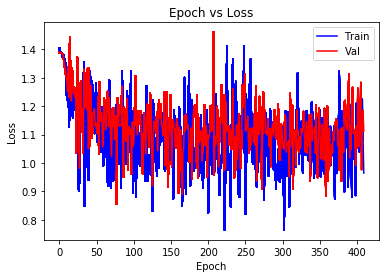

In [5]:
##training loop
train_losses = []
train_iterations = []
val_losses = []
val_iterations = []


for epoch in range(EPOCHS):
    optimizer.zero_grad()
    net.eval()#to allow for batch of 1
    #load the batch of data
    all_data,all_labels = sample_data(ShapeNetData,'train',BATCH_SIZE)
    mIoU_batch = 0.
    for data,labels in zip(all_data,all_labels):
        data = torch.from_numpy(np.expand_dims(np.array(data),0)).float().to(device)
        labels = torch.from_numpy(np.expand_dims(np.array(labels),0)).to(device)
        
        #compute the loss
        preds,M2 = net(data)
        loss = criterion(preds[0,:,:],labels[0,:])
    
        #add transformation matrix regularization loss
        I = torch.eye(64).unsqueeze(0).to(device)
        loss2 = torch.mean(torch.norm(torch.bmm(M2,M2.transpose(2,1)) - I, dim=(1,2)))    
        loss += REG_WEIGHT*loss2
        
        mIoU_one_part = compute_mIoU(torch.max(preds[0,:,:],dim = 1).values,labels[0,:])
        mIoU_batch +=mIoU_one_part 
        
    train_losses.append(loss.detach().cpu())
    train_iterations.append(epoch)
    
    
    loss.backward()
    optimizer.step()
    scheduler.step()
    
    print("epoch:",epoch,"mIoU:",mIoU_batch/BATCH_SIZE)
    if epoch%VAL_EVERY == 0:
        with torch.no_grad():
            net.eval()
            #load the batch of eval data (batch size couldn't be too big)
            all_data,all_labels = sample_data(ShapeNetData,'val',BATCH_SIZE)
            for data,labels in zip(all_data,all_labels):
                data = torch.from_numpy(np.expand_dims(np.array(data),0)).float().to(device)
                labels = torch.from_numpy(np.expand_dims(np.array(labels),0)).to(device)

                #compute the loss
                preds,M2 = net(data)
                val_loss = criterion(preds[0,:,:],labels[0,:])

                #add transformation matrix regularization loss
                I = torch.eye(64).unsqueeze(0).to(device)
                loss2 = torch.mean(torch.norm(torch.bmm(M2,M2.transpose(2,1)) - I, dim=(1,2)))    
                val_loss += REG_WEIGHT*loss2

            val_losses.append(val_loss.detach().cpu())
            val_iterations.append(epoch)

# #     clear_output()
    plt.plot(train_iterations, train_losses, 'b',val_iterations, val_losses, 'r')
    plt.xlabel('Epoch')
    plt.ylabel('Loss') 
    plt.legend(['Train','Val'])
    plt.title('Epoch vs Loss')
#     plt.show()
    plt.savefig("./part_seg_losses.png") # save graph for training visualization

In [7]:
# ###save stuff
folder = 'results/'
torch.save(net.state_dict(), folder+str(class_ID)+'_part_seg_model')
filehandler = open(folder+str(class_ID)+'_part_seg_train_iterations', 'wb') 
pickle.dump(train_iterations, filehandler)
filehandler = open(folder+str(class_ID)+'_part_seg_train_losses', 'wb') 
pickle.dump(train_losses, filehandler)
filehandler = open(folder+str(class_ID)+'_part_seg_val_iterations', 'wb') 
pickle.dump(val_iterations, filehandler)
filehandler = open(folder+str(class_ID)+'_part_seg_val_losses', 'wb') 
pickle.dump(val_losses, filehandler)

/home/motion/.local/lib/python3.6/site-packages/torch/storage.py:34: FutureWarning: pickle support for Storage will be removed in 1.5. Use `torch.save` instead
  warnings.warn("pickle support for Storage will be removed in 1.5. Use `torch.save` instead", FutureWarning)


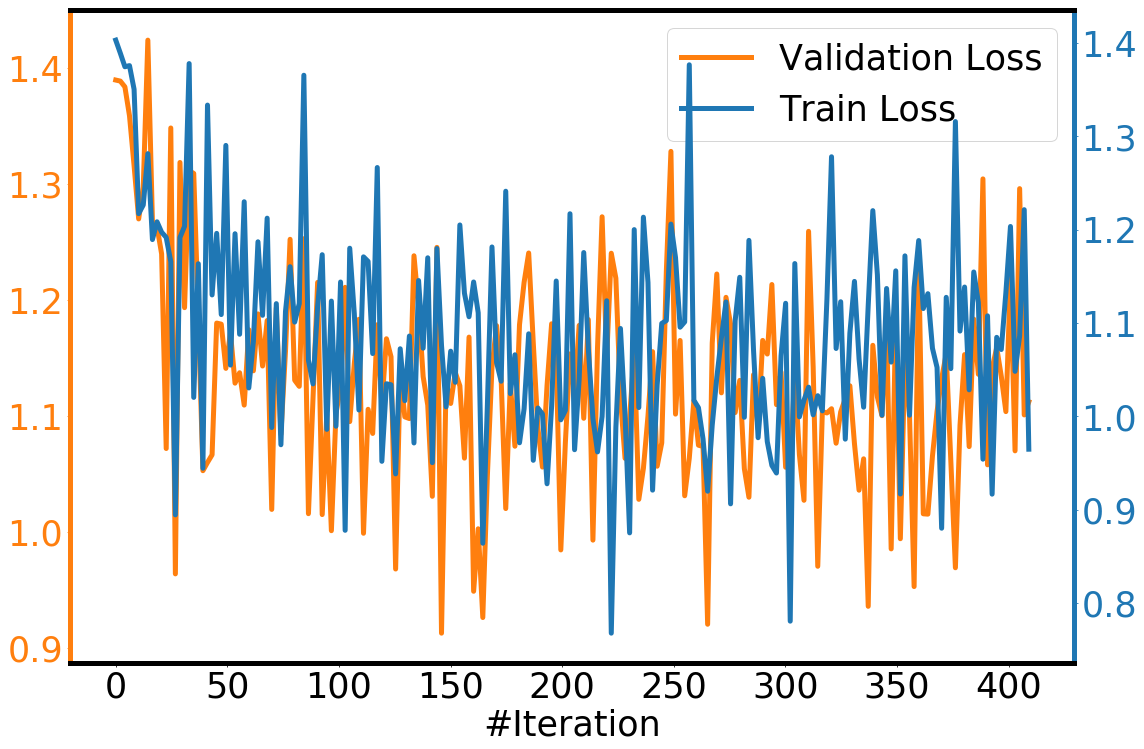

In [8]:
##plot training loss
import pickle
filehandler = open(folder+str(class_ID)+'_part_seg_train_iterations', 'rb') 
train_iterations = pickle.load(filehandler)
filehandler = open(folder+str(class_ID)+'_part_seg_train_losses', 'rb') 
train_losses = pickle.load(filehandler)
filehandler = open(folder+str(class_ID)+'_part_seg_val_iterations', 'rb') 
test_iterations = pickle.load(filehandler)
filehandler = open(folder+str(class_ID)+'_part_seg_val_losses', 'rb') 
test_losses = pickle.load(filehandler)

import os,math,numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy.interpolate

matplotlib.rcParams['axes.linewidth'] = 5
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
plt.rc('font',size=35)

iter=train_iterations
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
fig.set_size_inches(12*1.5,8*1.5)
xnew=np.linspace(min(iter),max(iter),200)  
test_loss_spline=scipy.interpolate.CubicSpline(iter,test_losses)
test_data = test_loss_spline(xnew)

ln=ax.plot(xnew,test_data,label="Validation Loss",linewidth=5,color='#ff7f0e')
ax.tick_params(axis='y',colors='#ff7f0e')

ax2=ax.twinx()
xnew=np.linspace(min(iter),max(iter),200)  
train_loss_spline=scipy.interpolate.CubicSpline(iter,train_losses)
train_data = train_loss_spline(xnew)
ln+=ax2.plot(xnew,train_data,label="Train Loss",linewidth=5,color='#1f77b4')
ax2.tick_params(axis='y',colors='#1f77b4')
ax2.spines['right'].set_color('#1f77b4')
ax2.spines['left'].set_color('#ff7f0e')

labs=[l.get_label() for l in ln]
ax.legend(ln,labs,loc=0)

#ax.set_ylabel("Value")
ax.set_xlabel("#Iteration")
plt.savefig("Iteration.pdf",bbox_inches='tight',pad_inches=0)
plt.show()

In [11]:
## compute accuracy for the test set 

def get_all_data(dataset,data_type):
    pcds,labels,fns = dataset.get_all_data(data_type)
    return pcds,labels

all_data,all_labels = get_all_data(ShapeNetData,'test')
mIoU = 0.
for data,labels in zip(all_data,all_labels):
    data = torch.from_numpy(np.expand_dims(np.array(data),0)).float().to(device)
    labels = torch.from_numpy(np.expand_dims(np.array(labels),0)).to(device)

    #compute the loss
    preds,M2 = net(data)
    loss = criterion(preds[0,:,:],labels[0,:])

    #add transformation matrix regularization loss
    I = torch.eye(64).unsqueeze(0).to(device)
    loss2 = torch.mean(torch.norm(torch.bmm(M2,M2.transpose(2,1)) - I, dim=(1,2)))    
    loss += REG_WEIGHT*loss2

    mIoU_one_part = compute_mIoU(torch.max(preds[0,:,:],dim = 1).values,labels[0,:])
    mIoU +=mIoU_one_part
    
print('test mIoU:',mIoU/len(all_data))

test mIoU: 0.006842619745845553
